## ColorIt: Colorize your B/W images

Dataset: https://www.kaggle.com/thedownhill/art-images-drawings-painting-sculpture-engraving/version/2 + Added images from Google

---

### 1. Importing Dependencies

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imread, imshow
import shutil
import os

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU
from keras.models import Sequential, load_model

### 2. Importing dataset

In [2]:
#Import the dataset
TRAIN_DIR = '/content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/musemart/dataset_updated/training_set'
DEST = '/content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/train/images'

if not os.path.exists(DEST):
  os.makedirs(DEST)

for dir in os.listdir(TRAIN_DIR):
  for img in os.listdir(os.path.join(TRAIN_DIR,dir)):
    ORG = os.path.join(TRAIN_DIR,dir,img)
    try:
      imread(ORG)
      shutil.copy(ORG,DEST)
    except:
      print(f"The image at {ORG} cannot be read.")                    

The image at /content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/musemart/dataset_updated/training_set/painting/1325.jpg cannot be read.
The image at /content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/musemart/dataset_updated/training_set/painting/1375.jpg cannot be read.
The image at /content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/musemart/dataset_updated/training_set/painting/1350.jpg cannot be read.
The image at /content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/musemart/dataset_updated/training_set/painting/1400.jpg cannot be read.
The image at /content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/musemart/dataset_updated/training_set/painting/1425.jpg cannot be read.
The image at /content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/musemart/dataset_updated/training_set/painting/1450.jpg cannot be read.
The image at /content/drive/MyDrive/Building Innovative Systems/Project 2/da

In [19]:
#---Total number of images in training dataset
len(os.listdir('/content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/train/images'))

3263

In [20]:
#Applying Data Augmentation: Flipping and Rotation
train_datagen = ImageDataGenerator(rescale=1/255,
                                   featurewise_center=True,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [21]:
train = train_datagen.flow_from_directory('/content/drive/MyDrive/Building Innovative Systems/Project 2/dataset/train',
                                          target_size=(256,256),
                                          batch_size=1500,
                                          shuffle=True)

Found 3263 images belonging to 1 classes.


### 3. Visualization

In [22]:
#Visualization of images
t_img, label = train.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [23]:
def plotImg(img_arr,label):
  plt.figure(figsize=(5,5))
  for im,l in zip(img_arr,label):
    plt.imshow(im)
    plt.title(l)
    plt.axis('off')
    plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


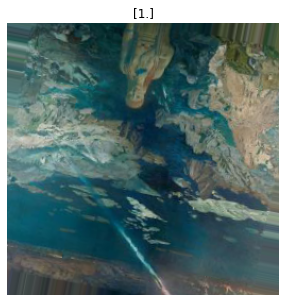

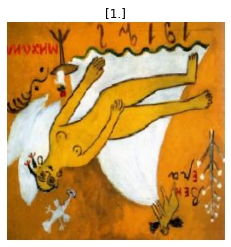

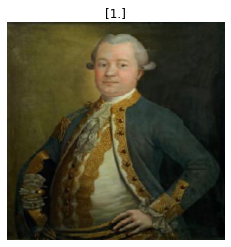

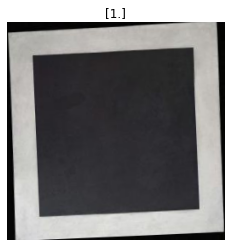

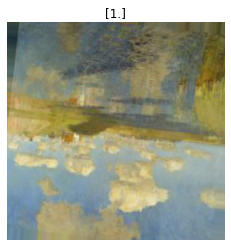

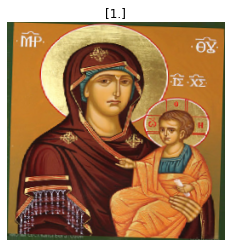

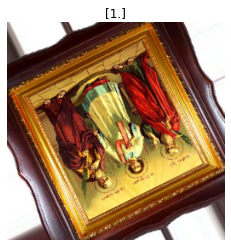

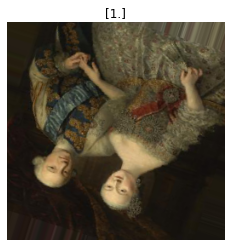

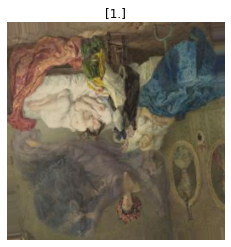

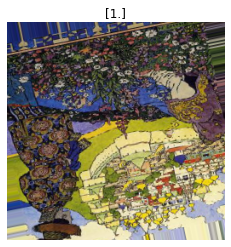

In [24]:
plotImg(t_img[:10],label[:10])

### 4. Preparing training dataset

Testing dataset is not required

In [25]:
#Convert rgb image into lab
X=[]
Y=[]

In [28]:
for img in t_img:
  try:
    lab=rgb2lab(img)
    X.append(lab[:,:,0])
    Y.append(lab[:,:,1:]/128)
  except:
    print("Error")

In [29]:
X_train = np.array(X)
X_train = np.expand_dims(X_train, axis=len(X_train.shape))

Y_train = np.array(Y)

X_train.shape, Y_train.shape

((1500, 256, 256, 1), (1500, 256, 256, 2))

### 5. Building the Autoencoder Model

In [16]:
#Building the model

#Encoder
model = Sequential()
model.add(Conv2D(64,(3,3), activation= 'relu', padding ='same',strides = 2, input_shape = (256,256,1)))
model.add(Conv2D(128,(3,3), activation= 'relu', padding ='same'))
model.add(Conv2D(128,(3,3), activation= 'relu', padding ='same',strides = 2))
model.add(Conv2D(256,(3,3), activation= 'relu', padding ='same'))
model.add(Conv2D(256,(3,3), activation= 'relu', padding ='same',strides = 2))
model.add(Conv2D(512,(3,3), activation= 'relu', padding ='same'))
model.add(Conv2D(512,(3,3), activation= 'relu', padding ='same'))
model.add(Conv2D(256,(3,3), activation= 'relu', padding ='same'))

#Decoder
model.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(16,(3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(2,(3,3), activation = LeakyReLU(alpha=0.01), padding = 'same'))
model.add(UpSampling2D((2,2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 512)       2

In [30]:
model.compile(optimizer='adam', metrics=['acc'], loss='mse')

In [31]:
his = model.fit(X_train, Y_train, epochs=40, batch_size=32, steps_per_epoch=X_train.shape[0]//32, verbose=1)

Epoch 1/40
46/46 [==============================] - 74s 665ms/step - loss: 0.4223 - acc: 0.5491
Epoch 2/40
46/46 [==============================] - 42s 658ms/step - loss: 0.0106 - acc: 0.8342
Epoch 3/40
46/46 [==============================] - 30s 657ms/step - loss: 0.0101 - acc: 0.8359
Epoch 4/40
46/46 [==============================] - 30s 656ms/step - loss: 0.0095 - acc: 0.8369
Epoch 5/40
46/46 [==============================] - 30s 657ms/step - loss: 0.0098 - acc: 0.8355
Epoch 6/40
46/46 [==============================] - 30s 657ms/step - loss: 0.0094 - acc: 0.8354
Epoch 7/40
46/46 [==============================] - 30s 657ms/step - loss: 0.0092 - acc: 0.8374
Epoch 8/40
46/46 [==============================] - 30s 656ms/step - loss: 0.0091 - acc: 0.8371
Epoch 9/40
46/46 [==============================] - 30s 657ms/step - loss: 0.0095 - acc: 0.8340
Epoch 10/40
46/46 [==============================] - 30s 657ms/step - loss: 0.0087 - acc: 0.8375
Epoch 11/40
46/46 [====================

In [33]:
model.save("/content/drive/MyDrive/Building Innovative Systems/Project 2/bestmodel.h5")

### 6. Plotting Graphs

In [117]:
model = load_model('bestmodel.h5')

acc = his.history['acc']
loss = his.history['loss']

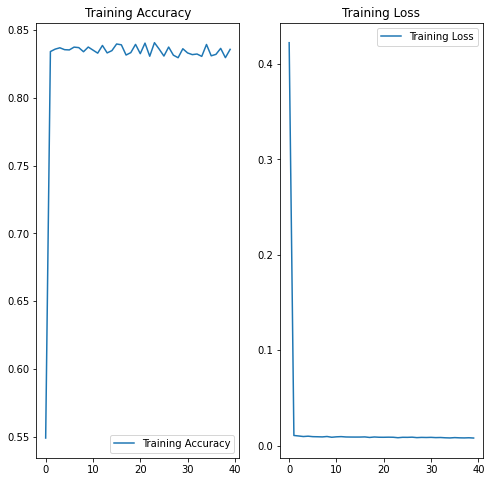

In [120]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(40), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(40), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

### 7. Coloring the B/W input image

In [106]:
def colorize(path):
  imshow(path)
  img1_color=[]
  img = img_to_array(
      load_img(path,target_size=(256,256,3))    
  )/255
  img1_color.append(img)
  img1_color = rgb2lab(img1_color)[:,:,:,0]
  img1_color = img1_color.reshape(img1_color.shape+(1,))
  output1 = model.predict(img1_color)
  output1=output1*128

  result = np.zeros((256,256,3))
  result[:,:,0] = img1_color[0][:,:,0]
  result[:,:,1:] = output1[0]

  img=lab2rgb(result)
  imshow(img)

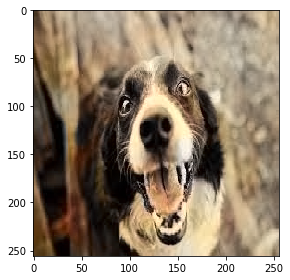

In [107]:
colorize("/content/op.jfif")